In [1]:

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json



Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 64 bytes


In [4]:

!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection

 99% 15.0M/15.1M [00:01<00:00, 22.1MB/s]
100% 15.1M/15.1M [00:01<00:00, 15.0MB/s]


In [ ]:
# load tqdm
!pip install --force https://github.com/chengs/tqdm/archive/colab.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     - 91.8 kB 1.7 MB/s 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for tqdm: filename=tqdm-4.28.1-py2.py3-none-any.whl size=47876 sha256=2ce33d8a18def073aa98f3296590d3d663d8f1b8493d071ebb1e77b24b2ca6a4
  Stored in directory: /tmp/pip-ephem-wheel-cache-83pqomlg/wheels/dd/d1/3a/5f30b73f63af33d7020835aff7cec9fbded1a437e67fa0fd79
Successfully built tqdm
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.65.0
    Uninstalling tqdm-4.65.0:
      Successfully uninstalled tqdm-4.65.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spacy 3.5.1 requires tqdm<5.0.0,>=4.38.0, but you have tqdm 4.28.1 which is incompatible.
prophet 1.1.2 requires tqdm>=4.36.1, but you have tqdm 4.28.1 which is incompatible.
panel 0.14.4 requires tqdm>=4.

In [2]:
import tensorflow as tf
from zipfile import ZipFile
import os,glob
import cv2
from tqdm import tqdm_notebook as tqdm
import numpy as np
from sklearn  import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense,MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Input
from keras.layers import Flatten

In [5]:
from zipfile import ZipFile
file_name = "/content/brain-mri-images-for-brain-tumor-detection.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
os.chdir('/content/yes')
X=[]
y=[]
for i in tqdm(os.listdir()):
      img=cv2.imread(i) 
      img=cv2.resize(img,(224,224))
      X.append(img)
      y.append((i[0:1])) 
      print(i[0:1])
os.chdir('/content/no')
for i in tqdm(os.listdir()):
      img=cv2.imread(i) 
      img=cv2.resize(img,(224,224))
      X.append(img) 
for i in range(1,99):
      y.append('N')
print(y)


<ipython-input-24-4f5c7b95a0ed>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(os.listdir()):


  0%|          | 0/155 [00:00<?, ?it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


<ipython-input-24-4f5c7b95a0ed>:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(os.listdir()):


  0%|          | 0/98 [00:00<?, ?it/s]

['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',

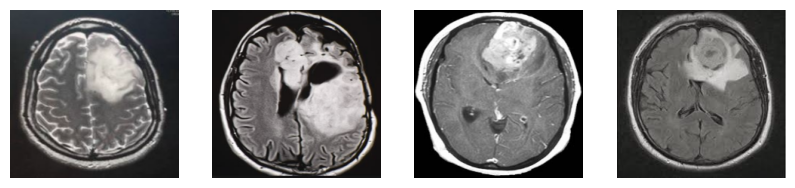

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(4):
     plt.subplot(1,4,i+1)
     plt.imshow(X[i],cmap="gray")
     plt.axis("off")
plt.show()

In [ ]:
X_train, X_test, y_train, y_test=train_test_split ( X, y, test_size=0.33, random_state=42)
print("Shape of an image in X_train:",X_train[0].shape)
print("Shape of an image in X_test:",X_test[0].shape)


Shape of an image in X_train: (224, 224, 3)
Shape of an image in X_test: (224, 224, 3)


In [ ]:
le=preprocessing.LabelEncoder() 
y_train=le.fit_transform(y_train)
y_test=le.fit_transform(y_test)
y_train=tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test=tf.keras.utils.to_categorical(y_test, num_classes=2)
y_train=np.array(y_train)
X_train=np.array(X_train) 
y_test=np.array(y_test)
X_test=np.array(X_test)  


In [ ]:
print("X_train Shape: ", X_train.shape)
print("X_test Shape: ",X_test.shape)
print("y_train Shape: ",y_train.shape)
print("y_test Shape: ",y_test.shape)

X_train Shape:  (169, 224, 224, 3)
X_test Shape:  (84, 224, 224, 3)
y_train Shape:  (169, 2)
y_test Shape:  (84, 2)


In [ ]:
from keras.applications import vgg16
from keras.layers import Input
img_rows, img_cols=224, 224

vgg =vgg16.VGG16(weights='imagenet' ,
                 include_top=False,
                 input_shape=(img_rows, img_cols, 3))

#Here we freeze the last 4 layers
#layers are set to trainable as True by default
for layer in vgg.layers:
    layer.trainable=False

#let's print our layers

for(i,layer) in enumerate(vgg.layers):
    print(str(i)+ " "+layer.__class__.__name__, layer.trainable) 


0 InputLayer False
1 Conv2D False
2 Conv2D False
3 MaxPooling2D False
4 Conv2D False
5 Conv2D False
6 MaxPooling2D False
7 Conv2D False
8 Conv2D False
9 Conv2D False
10 MaxPooling2D False
11 Conv2D False
12 Conv2D False
13 Conv2D False
14 MaxPooling2D False
15 Conv2D False
16 Conv2D False
17 Conv2D False
18 MaxPooling2D False


In [ ]:
pip install -U git+https://github.com/apple/coremltools.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/apple/coremltools.git to /tmp/pip-req-build-qgbdm4ab
  Running command git clone --filter=blob:none --quiet https://github.com/apple/coremltools.git /tmp/pip-req-build-qgbdm4ab
  Resolved https://github.com/apple/coremltools.git to commit db6f29bd2af39040b1af33b28fcf86d441a8aa63
  Preparing metadata (setup.py) ... done
  Created wheel for coremltools: filename=coremltools-6.3.0-py3-none-any.whl size=1215804 sha256=753ccf8679a40575b5edf91f30e8cfce448c9ee9d5b909dd76515a69085ae5e5
  Stored in directory: /tmp/pip-ephem-wheel-cache-jh7stvd9/wheels/53/cd/6c/d94c905b9476d587b6080a06368ebbc8994929d37d47e11918
Successfully built coremltools


In [ ]:
from keras.layers.pooling.global_average_pooling2d import GlobalAveragePooling2D
def lw(bottom_model,num_classes):

      """create the top or head of the model that will be 
      placed ontop of the bottom layers"""
      top_model=bottom_model.output
      top_model=GlobalAveragePooling2D()(top_model)
      top_model=Dense(1024,activation='relu')(top_model)
      top_model=Dense(1024,activation='relu')(top_model)
      top_model=Dense(512,activation='relu')(top_model)
      top_model=Dense(num_classes,activation='softmax')(top_model)
      return top_model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D 
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D 

from keras.models import Model 

num_classes=2
FC_Head=lw(vgg, num_classes)
model=Model(inputs=vgg.input, outputs=FC_Head) 
print(model.summary()) 


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history=model.fit(X_train,y_train,
                  epochs=5,
                  validation_data=(X_test,y_test),
                  verbose=1,
                  initial_epoch=0)

Epoch 1/5
6/6 [==============================] - 115s 20s/step - loss: 6.5944 - accuracy: 0.5030 - val_loss: 1.9837 - val_accuracy: 0.6071
Epoch 2/5
6/6 [==============================] - 108s 19s/step - loss: 1.3364 - accuracy: 0.6450 - val_loss: 0.5959 - val_accuracy: 0.6905
Epoch 3/5
6/6 [==============================] - 106s 18s/step - loss: 0.4148 - accuracy: 0.8284 - val_loss: 0.3300 - val_accuracy: 0.8690
Epoch 4/5
6/6 [==============================] - 107s 19s/step - loss: 0.2962 - accuracy: 0.8817 - val_loss: 0.3483 - val_accuracy: 0.8929
Epoch 5/5
6/6 [==============================] - 106s 19s/step - loss: 0.2226 - accuracy: 0.9112 - val_loss: 0.3225 - val_accuracy: 0.8929


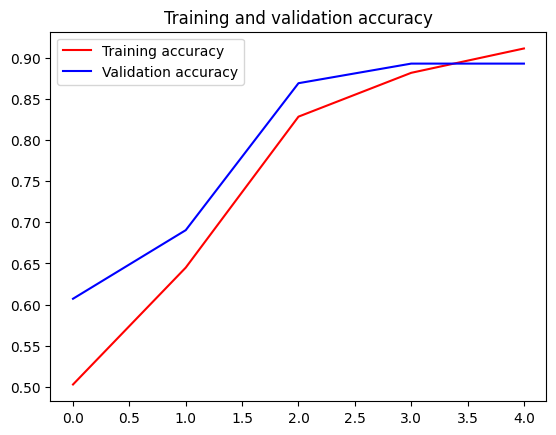

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 
acc=history.history['accuracy'] 
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss'] 

epochs=range(len(acc)) 

plt.plot(epochs, acc, 'r' ,label='Training accuracy') 
plt.plot(epochs, val_acc, 'b', label='Validation accuracy') 
plt.title('Training and validation accuracy')
plt.legend(loc=0) 
plt.figure()

plt.show()


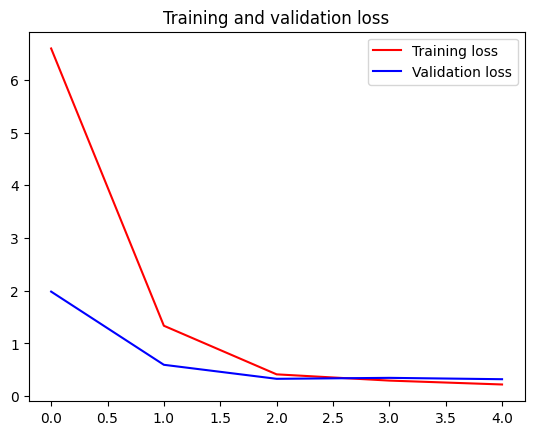

<Figure size 640x480 with 0 Axes>

In [ ]:

plt.plot(epochs, loss, 'r' ,label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.legend(loc=0) 
plt.figure()

plt.show()
